In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv


In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-classification-dataset/Heart Attack.csv")
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [5]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [6]:
X = df.iloc[:, :7]
X.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm
0,64,1,66,160,83,160.0,1.80
1,21,1,94,98,46,296.0,6.75
2,55,1,64,160,77,270.0,1.99
3,64,1,70,120,55,270.0,13.87
4,55,1,64,112,65,300.0,1.08


In [7]:
df.loc[df["class"] == "negative", "class" ] = 0
df.loc[df["class"] == "positive", "class" ] = 1
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [14]:
y = df["class"]
y = y.astype(int)
y.head()

0    0
1    1
2    0
3    1
4    0
Name: class, dtype: int64

<Axes: >

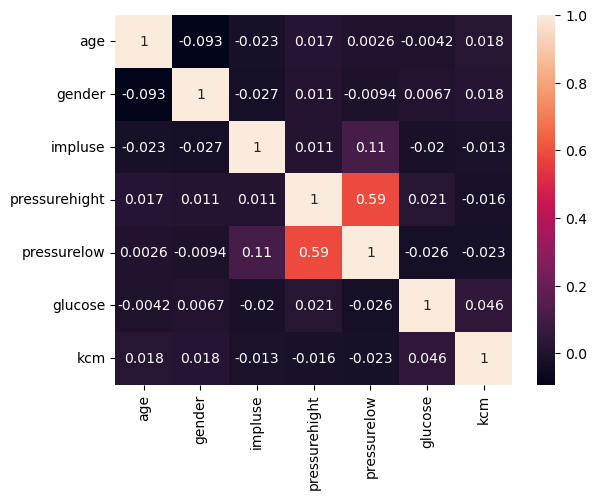

In [9]:
sns.heatmap(X.corr(),annot=True)

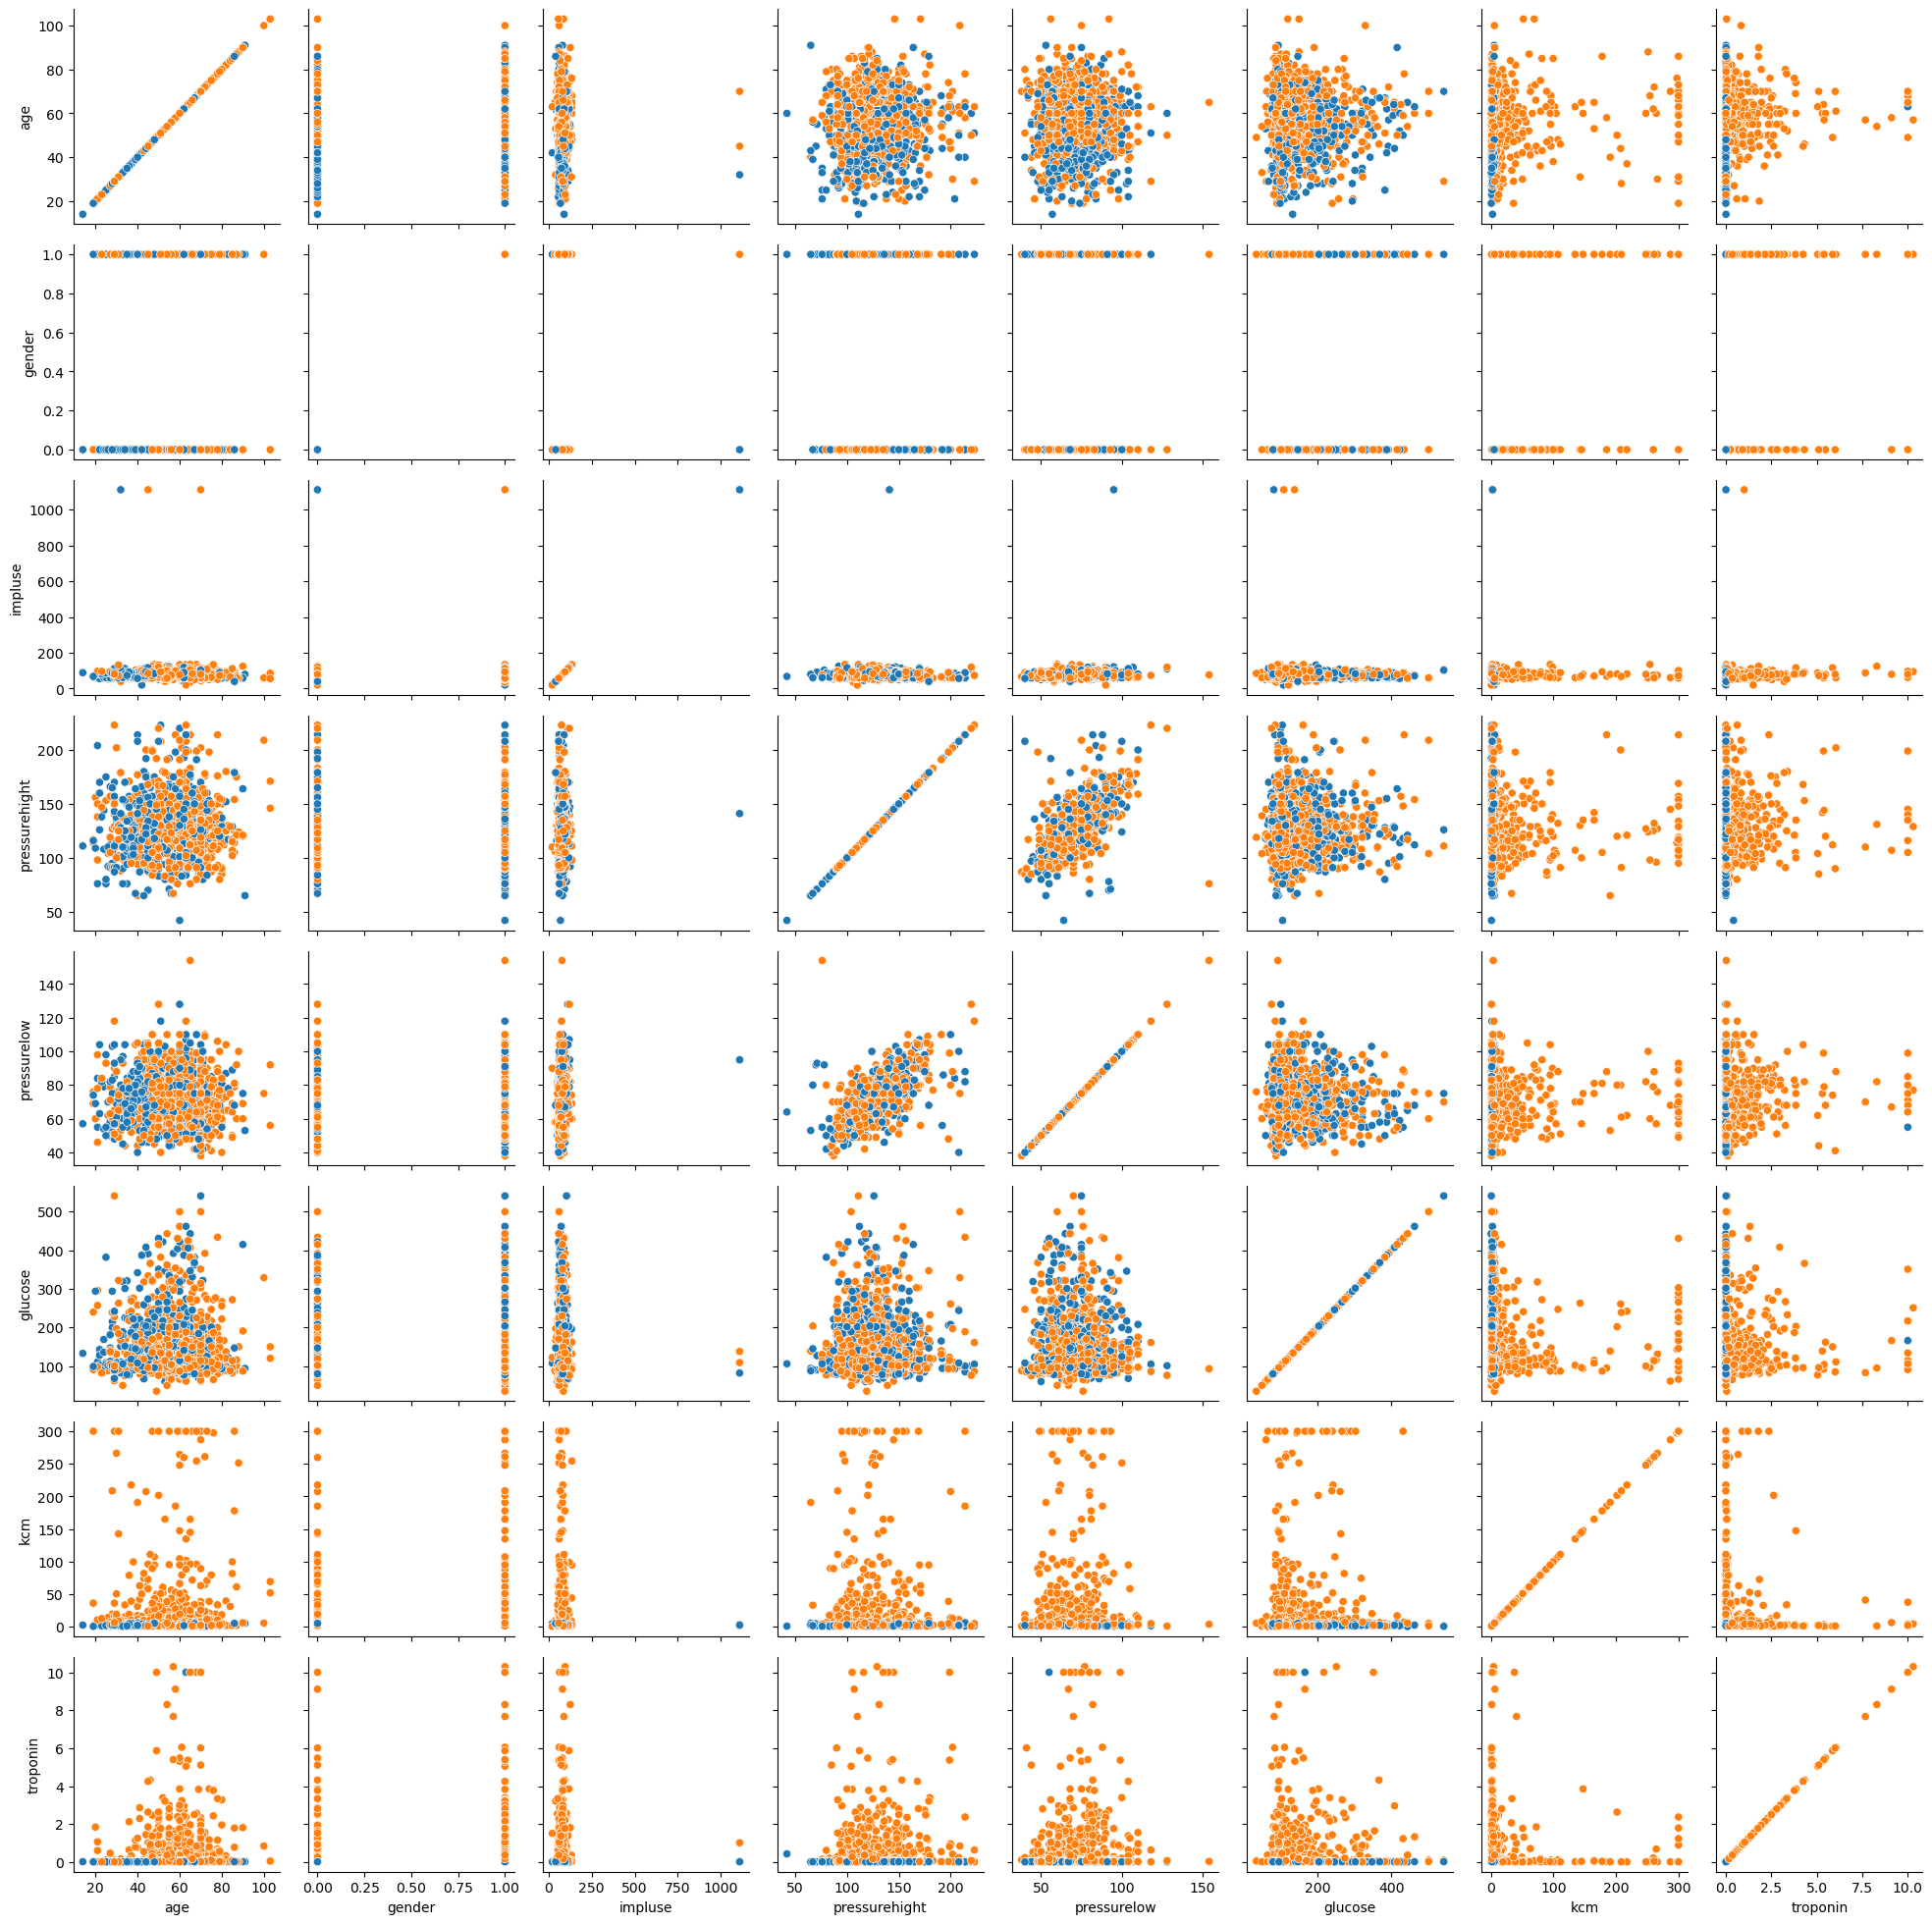

In [10]:
grid = sns.PairGrid(df, hue="class")
grid.map(sns.scatterplot)

In [41]:
X_new = df.iloc[:, 2:4]
X_new.head()

,impluse,pressurehight
0,66,160
1,94,98
2,64,160
3,70,120
4,64,112


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

def Calculator(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)
    pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())
    pipe.fit(X_train, y_train)
    result = pipe.score(X_test,y_test)
    print("Overall accuracy: " + result)

RFC_Calculator(X,y)

0.7090909090909091
